# Prophet Model 
Prophet는 긴 시계열에 대해서 잘 학습하고, 아웃라이어나 노이즈에도 강건하다고 알려져 있다. 가볍고, 학습 속도가 빠르면서도, 분석이 용이하다고 판단으로 도입.

### Prophet
Prophet은 2017년에 Facebook(현 Meta)에서 Time-series를 다루기 위해서 만든 Library이다. 통계적인 지식 없이 Time-series 데이터를 기반으로 자동으로 Forecast를 수행해주며, 아웃라이어, 데이터 부재 등에도 비교적 강건하게 모델링을 수행한다.
*참고 : 공식 홈페이지 Prophet

Facebook에서는 전문적인 시계열 분석가나 통계 전문가의 도움 없이 ‘도메인’ 전문가가 스스로 시계열 데이터를 분석하고 적용할 수 있도록 도구를 확보했다. 기존의 통계 기반의 시계열 분석 모델인 ARIMA나 ETS, TBATS 등의 단점과 복잡성을 단순화한 모델을 개발하고 이를 Prophet으로 패키징하여 배포한 것.

In [181]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('life_all.csv')
df = df.set_index('구분1')
df.head()

,1996 년,1997 년,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,...,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020년,2021년
구분1,,,,,,,,,,,,,,,,,,,,,
강원,59.0,37.9,40.9,63.0,66.0,91.5,122.1,102.0,123.1,126.0,...,169.7,153.5,204.1,161.7,137.3,162.7,196.3,264.7,104507.8,114571.8
경기,579.0,638.3,636.8,594.0,565.6,573.9,710.3,757.8,745.7,736.7,...,816.8,803.8,842.9,847.3,1017.4,1129.9,1301.5,1572.0,674379.0,789086.5
경남,173.0,116.5,154.1,168.7,179.1,229.7,261.2,263.0,279.5,301.8,...,374.4,310.2,360.9,307.6,336.4,331.2,335.0,409.1,160810.0,181060.0
경북,59.0,72.7,84.4,112.5,114.3,103.9,111.9,149.8,194.6,208.7,...,181.1,206.9,185.6,216.1,280.5,271.0,318.6,320.6,146123.6,147046.8
광주,42.0,49.5,52.4,58.2,63.6,52.4,129.8,115.8,134.3,134.0,...,124.1,133.4,128.9,141.6,138.5,119.8,135.3,129.6,51582.7,73882.0


## 전처리

In [110]:
df['2020 년'] = df['2020년'].apply(lambda x: x / 365)
df['2021 년'] = df['2021년'].apply(lambda x: x / 365)
df.drop(['2020년','2021년'], axis = 1, inplace = True)



In [111]:
df_t = df.transpose()
df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값
df_t.head()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
1996 년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1997 년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998 년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999 년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000 년,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


In [120]:
df_t = df.transpose()


df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값



In [121]:
df_t.index = df_t.index.str.replace("년", "")  # '년'제거 

df_t.head()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
1996,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1997,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


In [129]:
#to_datetime
df_t.index = pd.to_datetime(df_t.index)
df_t.index = df_t.index.strftime('%Y')


In [130]:
#시간 열로 변경 
df_r = df_t.reset_index() 
df_r.head()

구분1,index,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
0,1996,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1,1997,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
2,1998,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
3,1999,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
4,2000,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


## 예측

In [123]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### 서울

In [219]:
# 데이터 준비
data = df_r[['index', '서울']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [250]:
# 데이터 준비
data = df_r[['index', '서울']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경

#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


Initial log joint probability = -52.8437
Iteration  1. Log joint probability =    11.3407. Improved by 64.1844.
Iteration  2. Log joint probability =    23.0879. Improved by 11.7472.
Iteration  3. Log joint probability =    30.2303. Improved by 7.14231.
Iteration  4. Log joint probability =    35.6005. Improved by 5.37021.
Iteration  5. Log joint probability =    35.7399. Improved by 0.139386.
Iteration  6. Log joint probability =    35.7574. Improved by 0.0175284.
Iteration  7. Log joint probability =    35.7729. Improved by 0.015545.
Iteration  8. Log joint probability =    35.8035. Improved by 0.0305954.
Iteration  9. Log joint probability =    35.8098. Improved by 0.00627523.
Iteration 10. Log joint probability =    35.8377. Improved by 0.027915.
Iteration 11. Log joint probability =    35.8832. Improved by 0.0455127.
Iteration 12. Log joint probability =    35.9296. Improved by 0.0463359.
Iteration 13. Log joint probability =    36.0665. Improved by 0.136979.
Iteration 14. Log joi

In [251]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [252]:
# 예측
forecast = model.predict(last_5years)

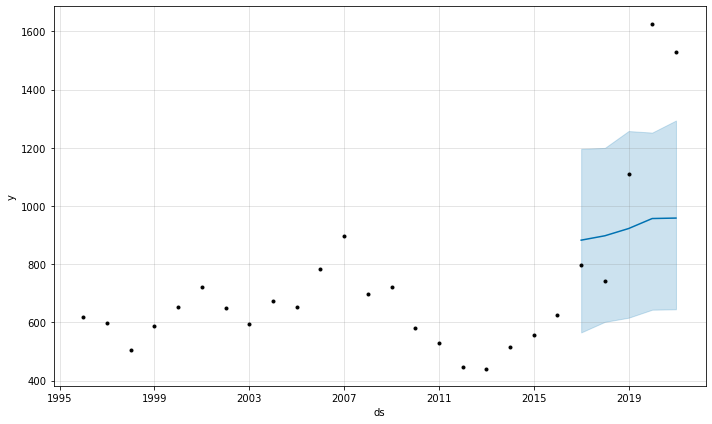

In [253]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [254]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

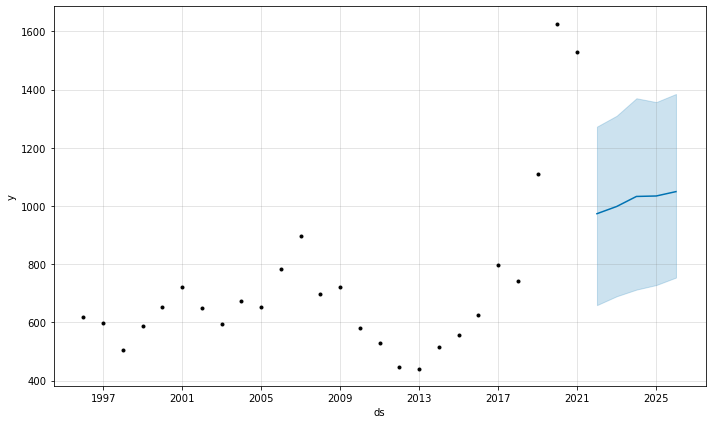

In [255]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [256]:
# 마지막 5년 제외시키기
train = data.drop(df.index[-5:])
y_true = data['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -57.1681
Iteration  1. Log joint probability =    13.9684. Improved by 71.1365.
Iteration  2. Log joint probability =    25.4712. Improved by 11.5028.
Iteration  3. Log joint probability =    28.7753. Improved by 3.30413.
Iteration  4. Log joint probability =    28.8677. Improved by 0.0923652.
Iteration  5. Log joint probability =    28.9341. Improved by 0.0664115.
Iteration  6. Log joint probability =    28.9722. Improved by 0.0380636.
Iteration  7. Log joint probability =    28.9803. Improved by 0.00818319.
Iteration  8. Log joint probability =    28.9883. Improved by 0.00794574.
Iteration  9. Log joint probability =     29.002. Improved by 0.0137326.
Iteration 10. Log joint probability =    29.0055. Improved by 0.00349886.
Iteration 11. Log joint probability =     29.006. Improved by 0.000514559.
Iteration 12. Log joint probability =    29.0068. Improved by 0.000803376.
Iteration 13. Log joint probability =    29.0099. Improved by 0.00301265.
Iterati

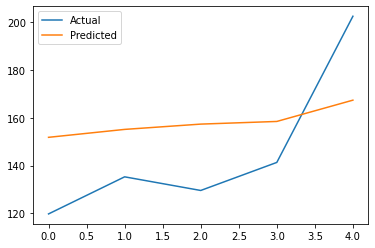

In [249]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


### 광주

In [219]:
# 데이터 준비
data = df_r[['index', '광주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [241]:
# 데이터 준비
data = df_r[['index', '광주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경

#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.



Initial log joint probability = -52.2407


Iteration  1. Log joint probability =    9.94733. Improved by 62.188.
Iteration  2. Log joint probability =    35.5565. Improved by 25.6092.
Iteration  3. Log joint probability =    35.5779. Improved by 0.0213547.
Iteration  4. Log joint probability =    35.6052. Improved by 0.0273471.
Iteration  5. Log joint probability =     35.675. Improved by 0.0697616.
Iteration  6. Log joint probability =    36.3249. Improved by 0.649951.
Iteration  7. Log joint probability =     36.361. Improved by 0.0360445.
Iteration  8. Log joint probability =    36.4392. Improved by 0.0781728.
Iteration  9. Log joint probability =    36.4603. Improved by 0.0211746.
Iteration 10. Log joint probability =    36.5079. Improved by 0.0475167.
Iteration 11. Log joint probability =    36.5314. Improved by 0.0235551.
Iteration 12. Log joint probability =    36.6852. Improved by 0.153785.
Iteration 13. Log joint probability =    36.8107. Improved by 0.125521.
Iteration 14. Log joint probability =    36.8175. Improved 

In [242]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [243]:
# 예측
forecast = model.predict(last_5years)

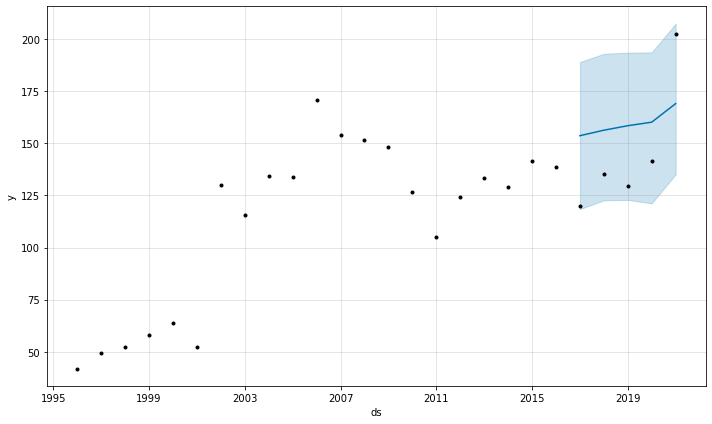

In [244]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [246]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

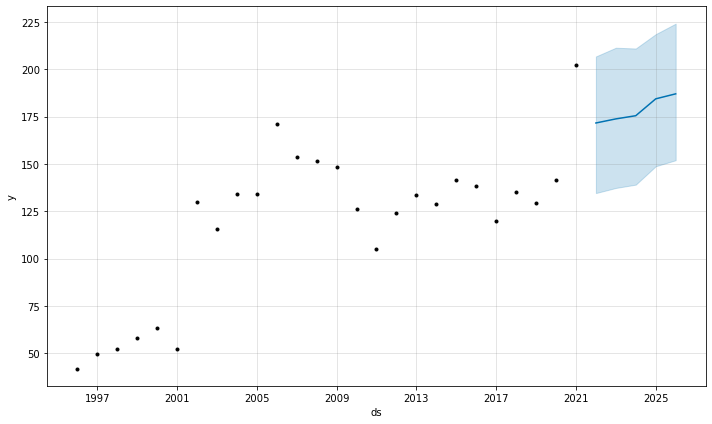

In [247]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [248]:
# 마지막 5년 제외시키기
train = data.drop(df.index[-5:])
y_true = data['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -56.818
Iteration  1. Log joint probability =     15.932. Improved by 72.75.
Iteration  2. Log joint probability =    29.2262. Improved by 13.2942.
Iteration  3. Log joint probability =     30.169. Improved by 0.94282.
Iteration  4. Log joint probability =    30.2212. Improved by 0.0521711.
Iteration  5. Log joint probability =    30.2237. Improved by 0.00246649.
Iteration  6. Log joint probability =    30.2452. Improved by 0.0215197.
Iteration  7. Log joint probability =    30.2543. Improved by 0.0091387.
Iteration  8. Log joint probability =    30.2636. Improved by 0.00922987.
Iteration  9. Log joint probability =    30.2703. Improved by 0.00677596.
Iteration 10. Log joint probability =     30.274. Improved by 0.00360699.
Iteration 11. Log joint probability =    30.2762. Improved by 0.00228518.
Iteration 12. Log joint probability =    30.2794. Improved by 0.00319796.
Iteration 13. Log joint probability =    30.2797. Improved by 0.000307734.
Iteration 

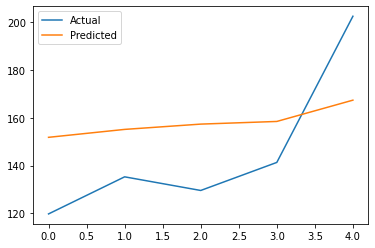

In [249]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


### 제주

In [257]:
# 데이터 준비
data = df_r[['index', '제주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [258]:
# 데이터 준비
data = df_r[['index', '제주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경

#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.



Initial log joint probability = -53.0239
Iteration  1. Log joint probability =    15.3639. Improved by 68.3878.
Iteration  2. Log joint probability =    25.0908. Improved by 9.72696.
Iteration  3. Log joint probability =    35.8475. Improved by 10.7566.
Iteration  4. Log joint probability =    36.9982. Improved by 1.15072.
Iteration  5. Log joint probability =     37.316. Improved by 0.317827.
Iteration  6. Log joint probability =    37.3474. Improved by 0.0314484.
Iteration  7. Log joint probability =    37.3553. Improved by 0.00786619.
Iteration  8. Log joint probability =    37.3945. Improved by 0.0391814.
Iteration  9. Log joint probability =    37.4141. Improved by 0.0196043.
Iteration 10. Log joint probability =    37.5163. Improved by 0.102228.
Iteration 11. Log joint probability =    37.7458. Improved by 0.229498.
Iteration 12. Log joint probability =    37.8309. Improved by 0.0850899.
Iteration 13. Log joint probability =    37.8557. Improved by 0.0247767.
Iteration 14. Log j

In [259]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [261]:
# 예측
forecast = model.predict(last_5years)

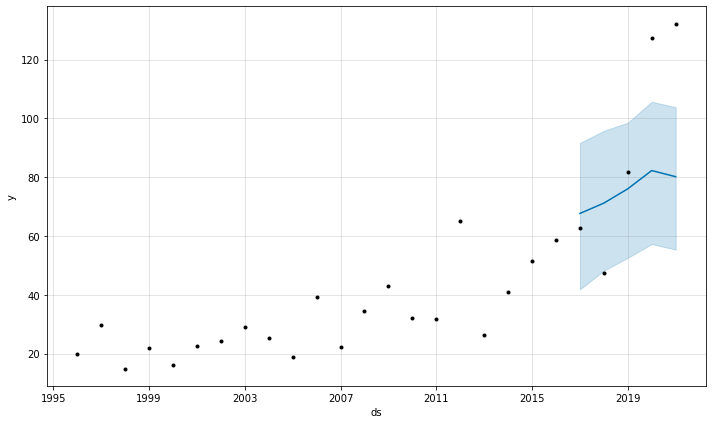

In [262]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [263]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

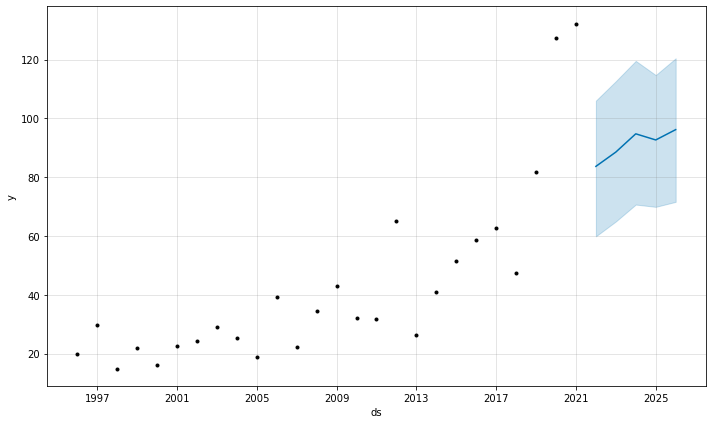

In [264]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [265]:
# 마지막 5년 제외시키기
train = data.drop(df.index[-5:])
y_true = data['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -57.3781
Iteration  1. Log joint probability =    12.0869. Improved by 69.465.
Iteration  2. Log joint probability =    24.4675. Improved by 12.3806.
Iteration  3. Log joint probability =    27.1746. Improved by 2.7071.
Iteration  4. Log joint probability =    28.2166. Improved by 1.04196.
Iteration  5. Log joint probability =    28.5265. Improved by 0.30991.
Iteration  6. Log joint probability =    28.5379. Improved by 0.0114228.
Iteration  7. Log joint probability =    28.6287. Improved by 0.0907743.
Iteration  8. Log joint probability =    28.7378. Improved by 0.109119.
Iteration  9. Log joint probability =    28.7651. Improved by 0.0272845.
Iteration 10. Log joint probability =    28.8619. Improved by 0.0968041.
Iteration 11. Log joint probability =    29.0044. Improved by 0.142523.
Iteration 12. Log joint probability =    29.1273. Improved by 0.1229.
Iteration 13. Log joint probability =    29.1302. Improved by 0.00291347.
Iteration 14. Log joint p

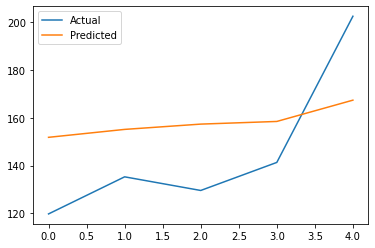

In [249]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
